# Estadística aplicada a la investigación

## Medidas de Asociación 

1. Primer documento [acá](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4640017/#:~:text=The%20relative%20risk%20(also%20known,event%20in%20the%20other%20group.)

2. Segundo documento [acá](https://www.scielo.cl/scielo.php?script=sci_arttext&pid=S0034-98872013001000014)

3. Tercer documento [acá](https://www.cdc.gov/csels/dsepd/ss1978/lesson3/section5.html#:~:text=A%20rate%20ratio%20compares%20the,to%20a%20suspected%20causative%20agent.)

### Introducción

1. ¿Qué es un estudio de cohorte?

2. **¿Qué es un Odds?**: Rutinariamente expresamos la posibilidad de ocurrencia de un evento de interés usando probabilidades. Por ejemplo, si el pronóstico del tiempo anuncia que la probabilidad de lluvia durante junio es 40%, entendemos que es posible que llueva en 12/30 días que tiene dicho mes. Una forma alternativa de representar la posibilidad de ocurrencia de un evento de interés es mediante el uso de odds, definidos como un cociente entre el número de eventos y el número de "no eventos". Siguiendo el ejemplo, el odds de lluvia durante junio corresponde al cociente entre el número de días de lluvia y "no lluvia" de aquel mes, es decir, 12/18. Probabilidades y odds son intercambiables: una probabilidad puede convertirse en odds mediante la fórmula (probabilidad/(1-probabilidad)), y un odds convertirse en una probabilidad mediante la fórmula (odds/(odds+1))

3. **¿Qué es un Odds?** Supongamos que usted está a cargo de la organización de un paseo al aire libre, y duda si realizarlo en junio o noviembre. El pronóstico del tiempo anuncia que la probabilidad de lluvia en noviembre es 10% (es decir, es posible que llueva en 3/30 días que tiene dicho mes), siendo su odds de lluvia equivalente a 3/27. ¿De qué manera compararía la posibilidad de que llueva en junio versus noviembre? 

4. La forma más simple es mediante el cálculo del **Riesgo Relativo (RR)**. En el ejemplo, el RR corresponde al cociente entre la probabilidad de que llueva en junio dividido por la probabilidad de que llueva en noviembre, y equivale a (12/30)/(3/30) = 4,0. Su interpretación es fácilmente comprensible: _"la probabilidad de que llueva en junio es 4,0 veces la probabilidad de que llueva en noviembre"_ (nótese que el término "probabilidad" es intercambiable por "riesgo"). 

5. Análogamente, **Odds Ratio (OR)** se define como un cociente entre dos odds. En el ejemplo, el OR corresponde al odds de que llueva en junio dividido por el odds de que llueva en noviembre, y equivale a (12/18)/(3/27) = 6,0. Su interpretación es un poco más compleja: "la razón de posibles días de lluvia versus "no lluvia" es 6 veces mayor en junio en comparación a noviembre". Notará el lector que tanto el valor del RR como del OR harán optar por organizar el paseo al aire libre durante el mes de noviembre, minimizando así la posibilidad de que la lluvia arruine dicha actividad. 

### Estudio de cohorte

Tomado de [acá](
https://es.wikipedia.org/wiki/Estudio_de_cohorte)
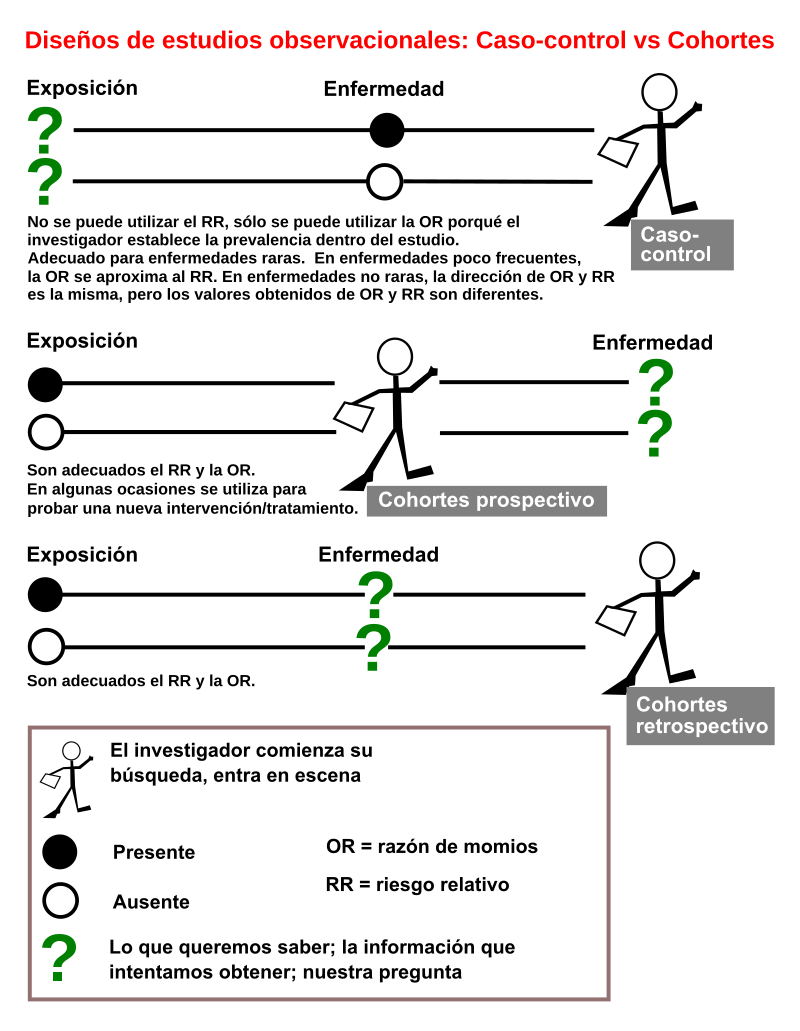

## Paquetes en R para el calculo de Odds Ratio

1. Documentación [acá](https://search.r-project.org/CRAN/refmans/epitools/html/epitab.html#:~:text=The%20epitab%20calculates%20odds%20ratios,%2C%20or%20small%2Dsample%20adjusted.)

In [ ]:
library(tidyverse)

In [ ]:
datos = read_csv("https://raw.githubusercontent.com/Cruzalirio/Unal-Enfermeria-/main/Datos/diabetes_BRFSS2015.csv")
### La función head me permite ver las primeras filas
head(datos)

Rows: 253680 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (22): Diabetes_012, HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, He...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,1,1,40,1,0,0,0,0,⋯,1,0,5,18,15,1,0,9,4,3
0,0,0,0,25,1,0,0,1,0,⋯,0,1,3,0,0,0,0,7,6,1
0,1,1,1,28,0,0,0,0,1,⋯,1,1,5,30,30,1,0,9,4,8
0,1,0,1,27,0,0,0,1,1,⋯,1,0,2,0,0,0,0,11,3,6
0,1,1,1,24,0,0,0,1,1,⋯,1,0,2,3,0,0,0,11,5,4
0,1,1,1,25,1,0,0,1,1,⋯,1,0,2,0,2,0,1,10,6,8


In [ ]:
install.packages("epitools")
library(epitools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Factores de riesgo para Stroke
1. HighChol

In [ ]:
tabla = table(datos$HighChol, datos$Stroke)
tabla

   
         0      1
  0 142453   3636
  1 100935   6656

In [ ]:
tabla = table(datos$Sex, datos$Stroke)
tabla

   
         0      1
  0 136288   5686
  1 107100   4606

In [ ]:
rownames(tabla) = c("Female", "Male")
colnames(tabla) = c("Sin ACV", "con ACV")
tabla

        
         Sin ACV con ACV
  Female  136288    5686
  Male    107100    4606

### Razon de riesgo

In [ ]:
RazonRiesgo = epitab(tabla, rev = "n", method = "riskratio",
                    oddsratio="midp", riskratio = "small",
                    rateratio = "midp",
                    pvalue="chi2")
RazonRiesgo

,Sin ACV,p0,con ACV,p1,riskratio,lower,upper,p.value
Female,136288,0.9599504,5686,0.04004959,1.000000,NA,NA,NA
Male,107100,0.9587668,4606,0.04123324,1.029381,0.990944,1.069309,0.1335978


### Razon de Odds

In [ ]:
RazonOdds = epitab(tabla, rev = "n", method = "oddsratio",
                    oddsratio="midp", riskratio = "small",
                    rateratio = "midp",
                    pvalue="chi2")
RazonOdds

,Sin ACV,p0,con ACV,p1,oddsratio,lower,upper,p.value
Female,136288,0.5599619,5686,0.5524679,1.000000,NA,NA,NA
Male,107100,0.4400381,4606,0.4475321,1.030855,0.9907316,1.07252,0.1335978


### Otro ejemplo

-------------------------- EPOC-----------

-------------------- No -------- Sí -------

No Fumador-- 150 ------33 ---------------

Fumador  --- 70 ------ 60 --------------


In [ ]:
datos = matrix(c(150,33,70,150), ncol=2, nrow=2, byrow = TRUE)
datos = as.table(datos)
datos

    A   B
A 150  33
B  70 150

In [ ]:
rownames(datos) = c("No fumador", "Fumador")
colnames(datos) = c("No EPOC", "EPOC")
datos

           No EPOC EPOC
No fumador     150   33
Fumador         70  150

In [ ]:
RazonOdds = epitab(datos, rev = "n", method = "oddsratio",
                    oddsratio="midp", riskratio = "small",
                    rateratio = "midp",
                    pvalue="chi2", conf.level=0.95)
RazonOdds

,No EPOC,p0,EPOC,p1,oddsratio,lower,upper,p.value
No fumador,150,0.6818182,33,0.1803279,1.000000,NA,NA,NA
Fumador,70,0.3181818,150,0.8196721,9.646911,6.077855,15.66479,7.702721e-24


In [ ]:
RazonOdds = epitab(datos, rev = "c", method = "oddsratio",
                    oddsratio="midp", riskratio = "small",
                    rateratio = "midp",
                    pvalue="chi2", conf.level=0.99999999)
RazonOdds

,EPOC,p0,No EPOC,p1,oddsratio,lower,upper,p.value
No fumador,33,0.1803279,150,0.6818182,1.000000,NA,NA,NA
Fumador,150,0.8196721,70,0.3181818,0.103664,0.02296489,0.3811735,7.702721e-24


# Comparación de medias

7. Attribute information: 
     1. Class: DIE, LIVE
     2. AGE: 10, 20, 30, 40, 50, 60, 70, 80
     3. SEX: male, female
     4. STEROID: no, yes
     5. ANTIVIRALS: no, yes
     6. FATIGUE: no, yes
     7. MALAISE: no, yes
     8. ANOREXIA: no, yes
     9. LIVER BIG: no, yes
    10. LIVER FIRM: no, yes
    11. SPLEEN PALPABLE: no, yes
    12. SPIDERS: no, yes
    13. ASCITES: no, yes
    14. VARICES: no, yes
    15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
        -- see the note below
    16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
    17. SGOT: 13, 100, 200, 300, 400, 500, 
    18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
    19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
    20. HISTOLOGY: no, yes


## Dos medias de grupos independientes

1. Tomado de [acá](https://evidenciasenpediatria.es/files/41-13858-RUTA/51_Fundamentos_ComparacionMedias.pdf)




In [ ]:
install.packages("agricolae")
library(tidyverse)
library(agricolae)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘shiny’, ‘miniUI’, ‘questionr’, ‘klaR’




In [ ]:
url ="https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/hepatitis_enfermeria.csv"
datosHepa = read_csv(url, na="?")
head(datosHepa)

Rows: 155 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (20): CLASS, AGE, SEX, STEROID, ANTIVIRALS, FATIGUE, MALAISE, ANOREXIA, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


CLASS,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,NA,1
2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,NA,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,NA,1
2,31,1,NA,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,NA,200,4.0,NA,1
2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1


### La albumina cambia por entre sexos

Warning message:
“Removed 16 rows containing non-finite values (`stat_boxplot()`).”


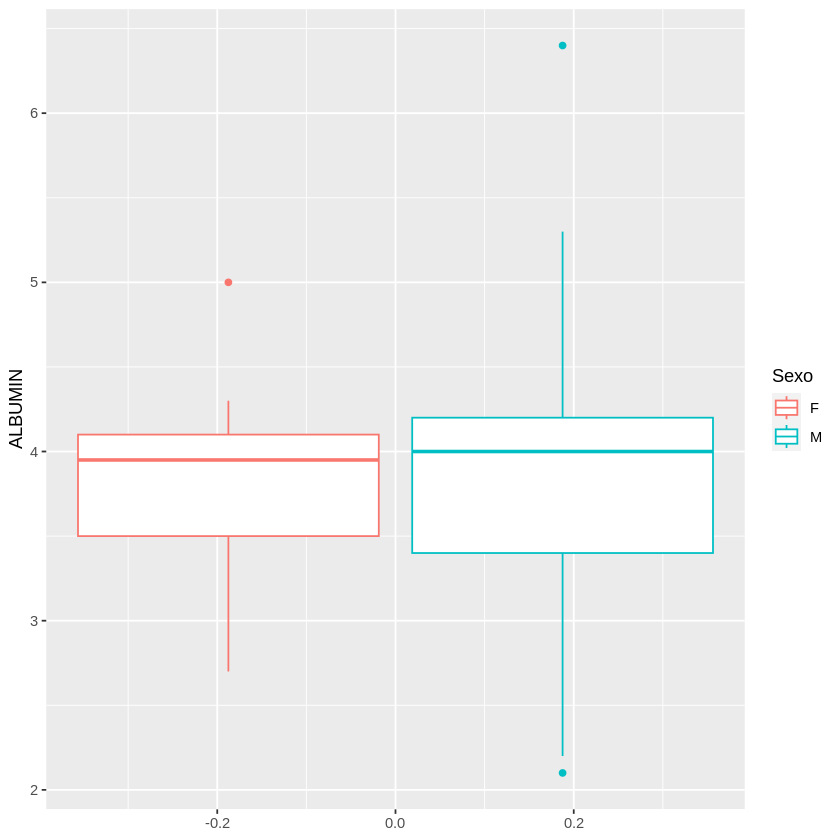

In [ ]:
datosHepa = datosHepa %>% mutate(Sexo=ifelse(SEX==2, "F", "M"))
ggplot(datosHepa, aes(y=ALBUMIN, color=Sexo))+geom_boxplot()

Warning message:
“Removed 16 rows containing non-finite values (`stat_density()`).”


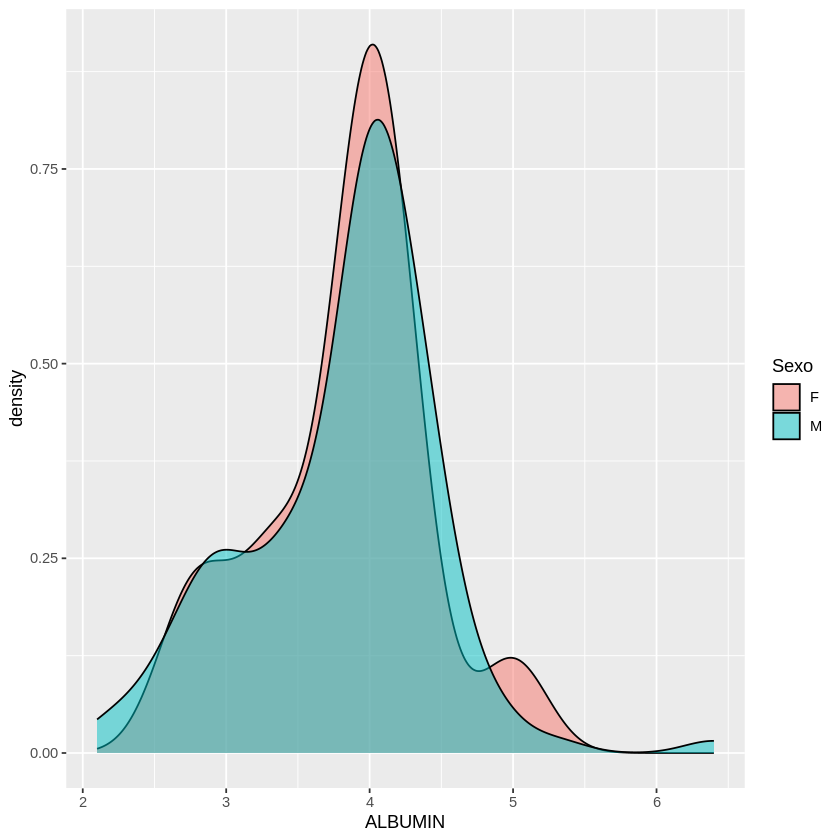

In [ ]:
ggplot(datosHepa, aes(x=ALBUMIN, fill=Sexo))+geom_density(alpha=0.5)

Las varianzas se comparan con la siguiente hipotesis nula

$$H_0: \; \sigma^2_A = \sigma^2_B$$

$$H_0: \; \frac{\sigma^2_A}{\sigma^2_B}=1$$


In [ ]:
### Primero vemos las varianzas

datosM = datosHepa %>% filter(SEX==1)
datosF = datosHepa %>% filter(SEX==2)

var.test(datosM$ALBUMIN, datosF$ALBUMIN)


	F test to compare two variances

data:  datosM$ALBUMIN and datosF$ALBUMIN
F = 1.2453, num df = 124, denom df = 13, p-value = 0.6882
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.4686748 2.5029510
sample estimates:
ratio of variances 
          1.245276 


Las  medias se comparan con la siguiente hipotesis nula

$$H_0: \; \mu_A = \mu_B$$

$$H_0: \; \mu_A-\mu_B=0$$

In [ ]:
### Ahora si las medias

t.test(datosM$ALBUMIN, datosF$ALBUMIN)


	Welch Two Sample t-test

data:  datosM$ALBUMIN and datosF$ALBUMIN
t = -0.074496, df = 16.845, p-value = 0.9415
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3688608  0.3437180
sample estimates:
mean of x mean of y 
 3.816000  3.828571 


## Dos medias de datos no bonitos (no normales)

Warning message:
“Removed 6 rows containing non-finite values (`stat_density()`).”


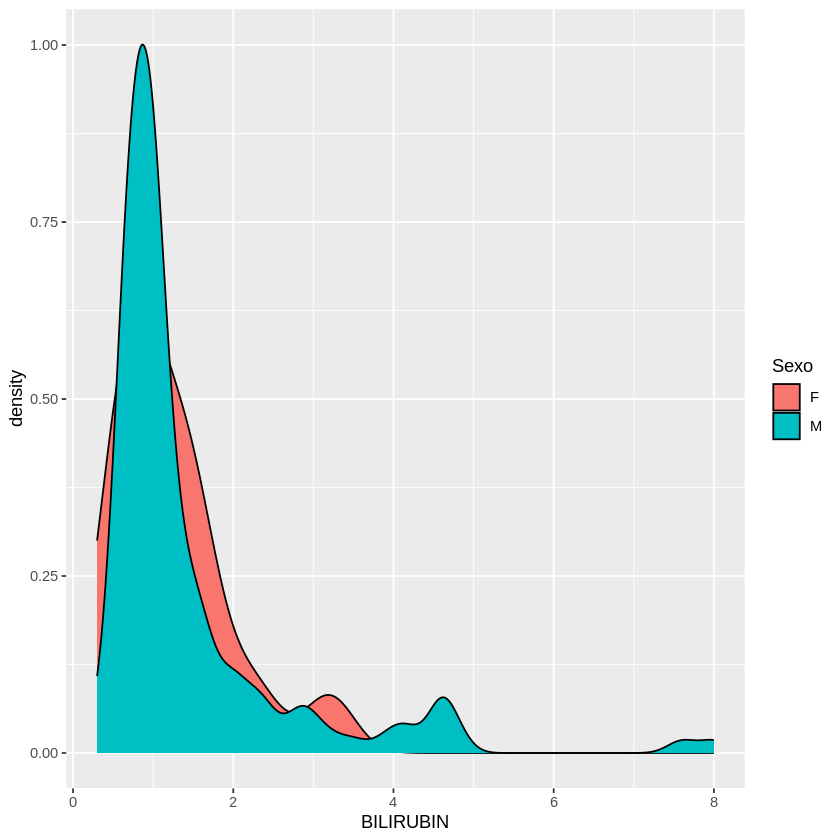

In [ ]:
ggplot(datosHepa, aes(x=BILIRUBIN, fill=Sexo))+ geom_density()

Prueba de Kruskal Wallis, [leer](https://www.cienciadedatos.net/documentos/20_kruskal-wallis_test)

In [ ]:
kruskal.test(datosHepa$BILIRUBIN, datosHepa$Sexo)


	Kruskal-Wallis rank sum test

data:  datosHepa$BILIRUBIN and datosHepa$Sexo
Kruskal-Wallis chi-squared = 0.087729, df = 1, p-value = 0.7671


## Dos medias del mismo grupo (datos pareados)

1. Se observaron personas en periodo 1, y luego en un periodo 2. Se observó el peso al finalizar cada periodo.

In [ ]:
url="https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/Pareados.csv"
datosPare = read_csv2(url)
datosPare

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 16 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (4): Persona, Periodo, pesoinc, pesofin

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Persona,Periodo,pesoinc,pesofin
<dbl>,<dbl>,<dbl>,<dbl>
5825,1,61.0,59.6
7916,1,45.0,43.3
7919,1,51.0,49.8
5831,1,56.0,57.0
5793,1,60.0,59.7
5795,1,64.0,63.0
5799,1,65.0,64.5
5834,1,52.0,52.9
5825,2,59.6,60.1


Las  medias se comparan con la siguiente hipotesis nula

$$H_0: \; \mu_1 = \mu_2$$

$$H_0: \; \mu_1-\mu_2=0$$

En este caso se calculan las diferencias
$$H_0: \; \mu_d=0$$

In [ ]:
datos1 = datosPare %>% filter(Periodo==1)
datos2 = datosPare %>% filter(Periodo ==2)

t.test(datos2$pesofin-datos1$pesofin)


	One Sample t-test

data:  datos2$pesofin - datos1$pesofin
t = 0.82359, df = 7, p-value = 0.4373
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.4677827  0.9677827
sample estimates:
mean of x 
     0.25 


## Y sí tenemos más de una variable independiente

Vamos a aprender como hacer un ANOVA

1. Nuestra variable objetivo tiene que ser continua
2. Debe haber al menos una variable que _explica_ la variable objetivo
3. Deber ser normal

In [ ]:
### variable objetivo = ALBUMINA
### Variables explicativas
### SEX, STEROID y ANTIVIRALS

datosHepa = datosHepa %>% mutate(Esteroides = ifelse(STEROID==1, "No", "Si"),
                            Antivirales = ifelse(ANTIVIRALS==1, "No", "Si"))

modelo =  lm(ALBUMIN~Sexo+Esteroides+Antivirales, data =datosHepa)
anova(modelo)
print(anova(modelo))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Sexo,1,0.00248514,0.00248514,0.006222318,0.937244416
Esteroides,1,3.07317248,3.07317248,7.694640061,0.006329245
Antivirales,1,1.95083257,1.95083257,4.884514135,0.028795777
Residuals,134,53.51843735,0.39939132,NA,NA


Analysis of Variance Table

Response: ALBUMIN
             Df Sum Sq Mean Sq F value   Pr(>F)   
Sexo          1  0.002 0.00249  0.0062 0.937244   
Esteroides    1  3.073 3.07317  7.6946 0.006329 **
Antivirales   1  1.951 1.95083  4.8845 0.028796 * 
Residuals   134 53.518 0.39939                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Y la normalidad

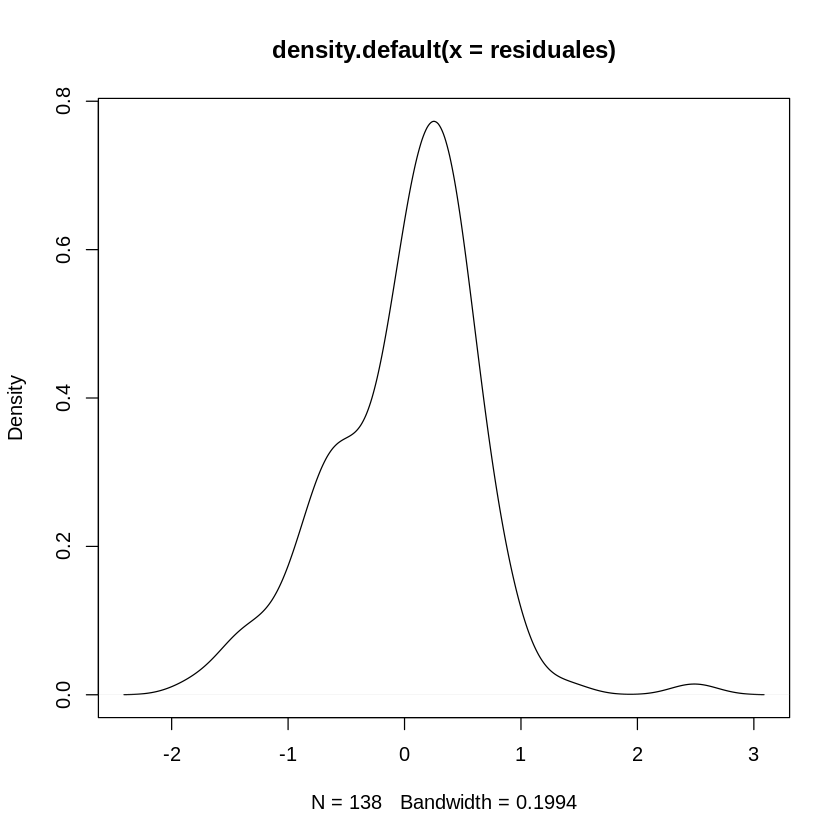

In [ ]:
residuales =resid(modelo)
plot(density(residuales))

### Prueba de shapiro

In [ ]:
shapiro.test(residuales)


	Shapiro-Wilk normality test

data:  residuales
W = 0.95828, p-value = 0.0003304


## ¿Y si tengo covariables?

1. Vamos a construir algunos modelos para algunos diseños experimentales


# Datos (Ejemplo) 

1. Una escala de conocimiento de autocuidado es aplicada a 160 pacientes, luego se les da un curso y se vuelve a aplicar la escala.  
- 
Decidir si las siguientes afirmaciones son verdaderas o falsas.

- Existen diferencias entre las puntuaciones de las personas por sexo antes de iniciar el curso.
- Existen diferencias entre las puntuaciones de las personas por edad antes de iniciar el curso.
- Existen diferencias entre las puntuaciones de las personas después de finalizar el curso. (hay que tener en cuenta que son datos pareados)

2. Construir la variable diferencia $Escala post- Escala pre$ y hacer un modelo de regresión en función de la edad y el sexo. 
- Realizar la tabla ANOVA
- Realizar el analisis de cada una de las causas de variación.

In [ ]:
url ="https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/Escala_ejemplo.csv"
Escala = read_csv2(url)
head(Escala)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 160 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (1): sexo
dbl (3): pre, pos, edad

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


sexo,pre,pos,edad
<chr>,<dbl>,<dbl>,<dbl>
F,83,83,48
M,58,65,37
M,63,77,66
F,73,70,46
M,64,72,47
M,63,79,28


## La prueba más básica
$$H_0: \mu_D\leq 0$$
$$H_a: \mu_D> 0$$


-Hipótesis operativa: El curso mejora la escala.

In [ ]:
## Calculo las diferencias

Escala = Escala %>% mutate(Diferencia = pos-pre)
Escala

sexo,pre,pos,edad,Diferencia
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
F,83,83,48,0
M,58,65,37,7
M,63,77,66,14
F,73,70,46,-3
M,64,72,47,8
M,63,79,28,16
M,68,77,63,9
M,58,76,63,18
M,59,76,50,17


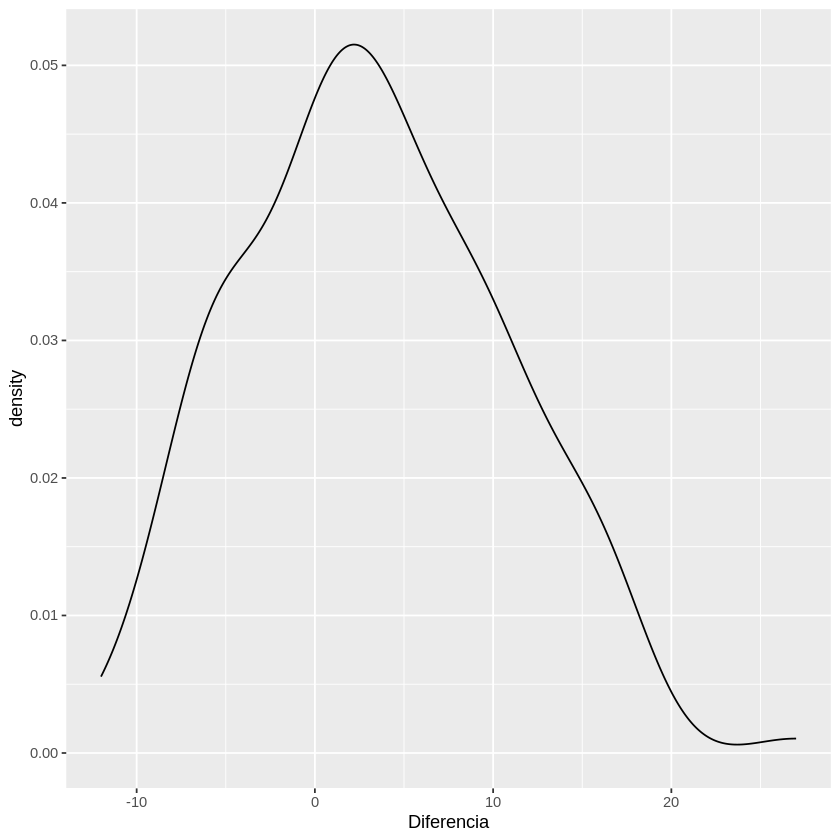

In [ ]:
ggplot(Escala, aes(x=Diferencia))+geom_density()

In [ ]:
### t.test()
t.test(Escala$Diferencia, conf.level = 0.95, alternative = "greater")


	One Sample t-test

data:  Escala$Diferencia
t = 5.7567, df = 159, p-value = 2.151e-08
alternative hypothesis: true mean is greater than 0
95 percent confidence interval:
 2.369378      Inf
sample estimates:
mean of x 
    3.325 


In [ ]:
### t.test() 
## Esta me sirve para hacer el intervalo de confianza
t.test(Escala$Diferencia, conf.level = 0.95, alternative = "two.sided")


	One Sample t-test

data:  Escala$Diferencia
t = 5.7567, df = 159, p-value = 4.302e-08
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 2.184258 4.465742
sample estimates:
mean of x 
    3.325 


## Modelo ANOVA sencillo

In [ ]:
modelo = lm(Diferencia ~ factor(sexo) + edad, data=Escala)

In [ ]:
modelo


Call:
lm(formula = Diferencia ~ factor(sexo) + edad, data = Escala)

Coefficients:
  (Intercept)  factor(sexo)M           edad  
      1.45412       10.52398       -0.05149  


## ANOVA 
1. Vamos a ver lo significativo

In [ ]:
print(anova(modelo))

Analysis of Variance Table

Response: Diferencia
              Df Sum Sq Mean Sq  F value Pr(>F)    
factor(sexo)   1 4137.5  4137.5 150.7170 <2e-16 ***
edad           1   39.6    39.6   1.4442 0.2313    
Residuals    157 4310.0    27.5                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Analizar el modelo

In [ ]:
modelo


Call:
lm(formula = Diferencia ~ factor(sexo) + edad, data = Escala)

Coefficients:
  (Intercept)  factor(sexo)M           edad  
      1.45412       10.52398       -0.05149  


In [ ]:
Escala = Escala %>% mutate(sexo1 = ifelse(sexo=="F", "Mujer", "Hombre"))
modelo = lm(Diferencia ~ factor(sexo1) + edad, data=Escala)
print(anova(modelo))
modelo

Analysis of Variance Table

Response: Diferencia
               Df Sum Sq Mean Sq  F value Pr(>F)    
factor(sexo1)   1 4137.5  4137.5 150.7170 <2e-16 ***
edad            1   39.6    39.6   1.4442 0.2313    
Residuals     157 4310.0    27.5                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



Call:
lm(formula = Diferencia ~ factor(sexo1) + edad, data = Escala)

Coefficients:
       (Intercept)  factor(sexo1)Mujer                edad  
          11.97810           -10.52398            -0.05149  


In [ ]:
Escala %>% group_by(sexo) %>% summarise(media=mean(Diferencia))

sexo,media
<chr>,<dbl>
F,-0.7731959
M,9.6349206


## Gráfica de la diferencia

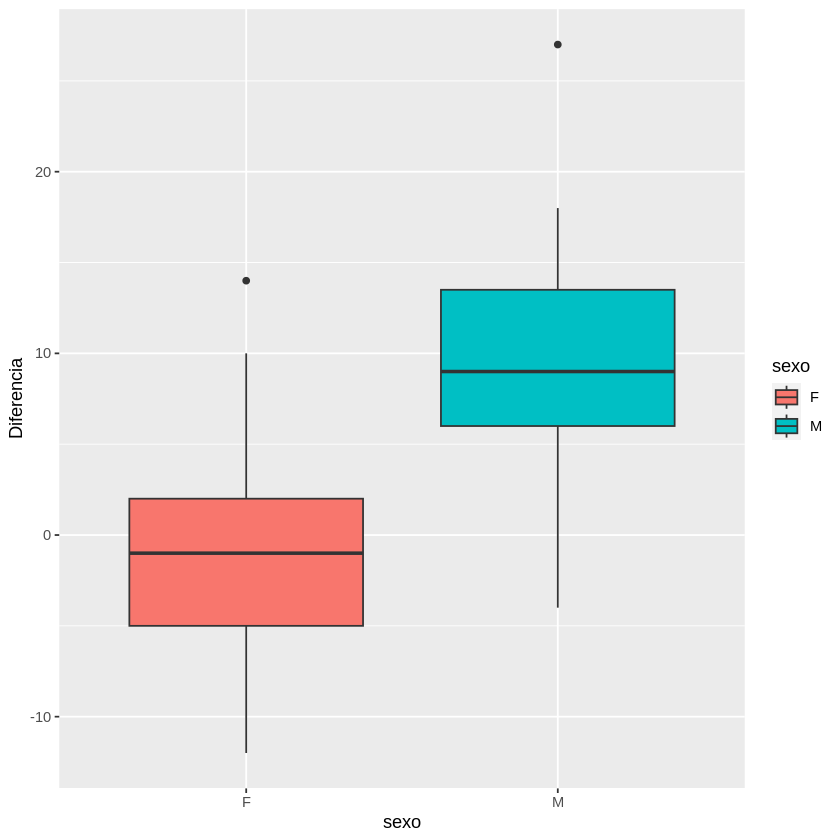

In [ ]:
ggplot(Escala, aes(x=sexo, y=Diferencia, fill=sexo))+
  geom_boxplot()

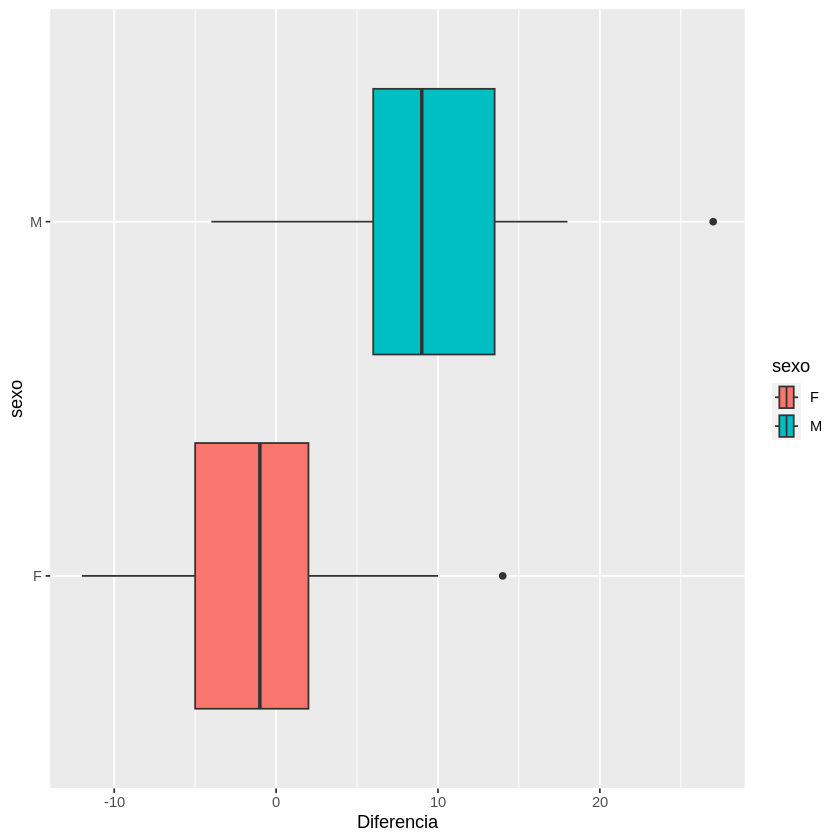

In [ ]:
ggplot(Escala, aes(y=sexo, x=Diferencia, fill=sexo))+
  geom_boxplot()

## Y el analisis previo

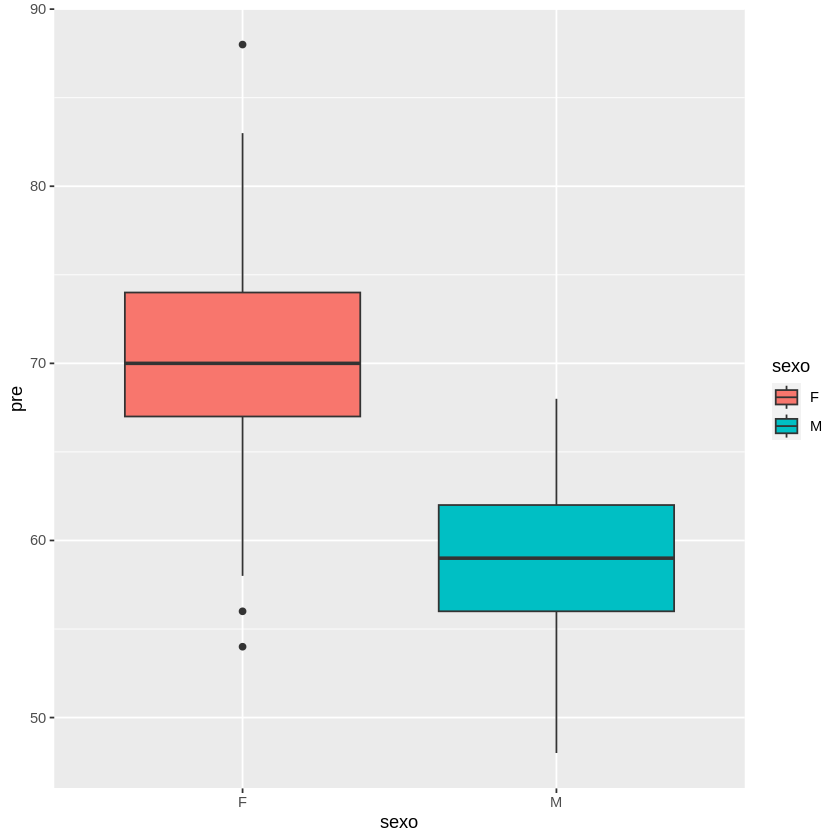

In [ ]:
ggplot(Escala, aes(x=sexo, y=pre, fill=sexo))+
  geom_boxplot()

## El posterior

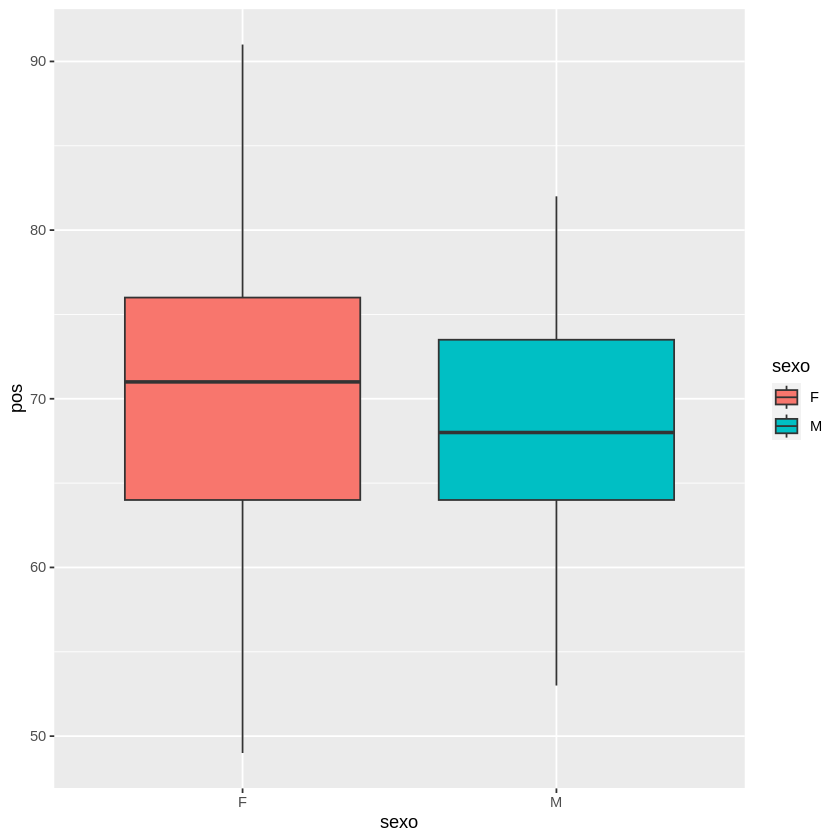

In [ ]:
ggplot(Escala, aes(x=sexo, y=pos, fill=sexo))+
  geom_boxplot()

## Y la edad

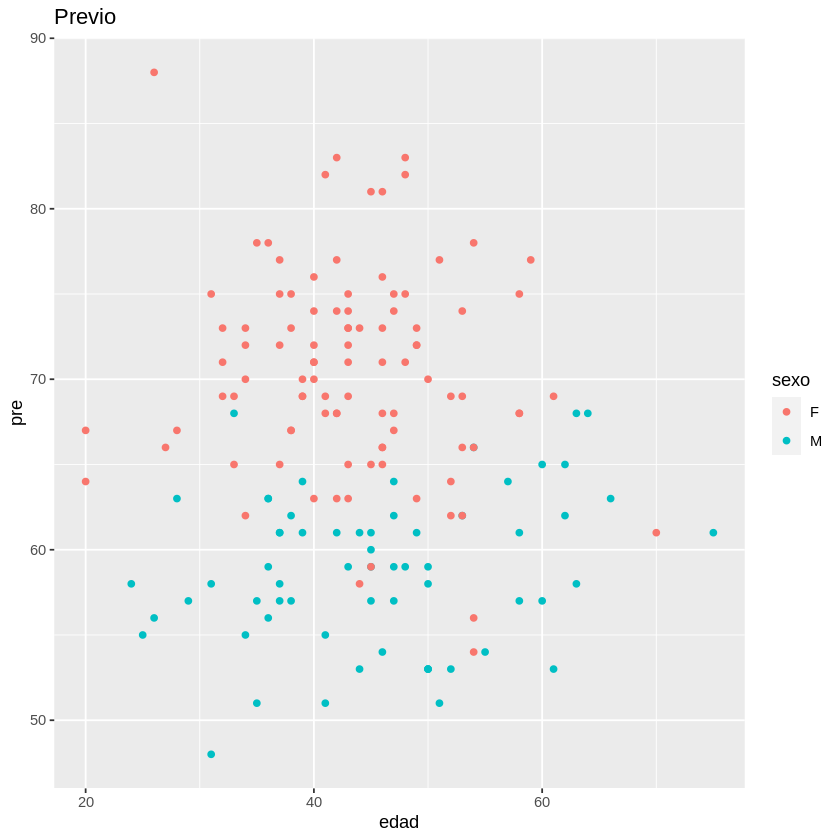

In [ ]:
ggplot(Escala, aes(x=edad, y=pre, color=sexo))+
  geom_point()+ggtitle("Previo")

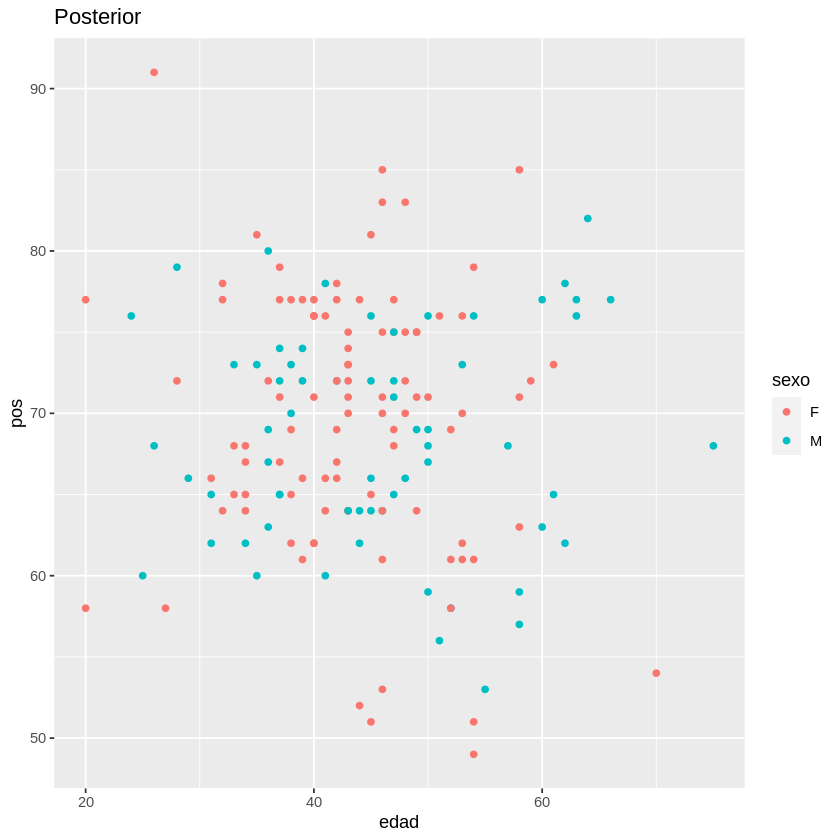

In [ ]:
ggplot(Escala, aes(x=edad, y=pos, color=sexo))+
  geom_point()+ggtitle("Posterior")

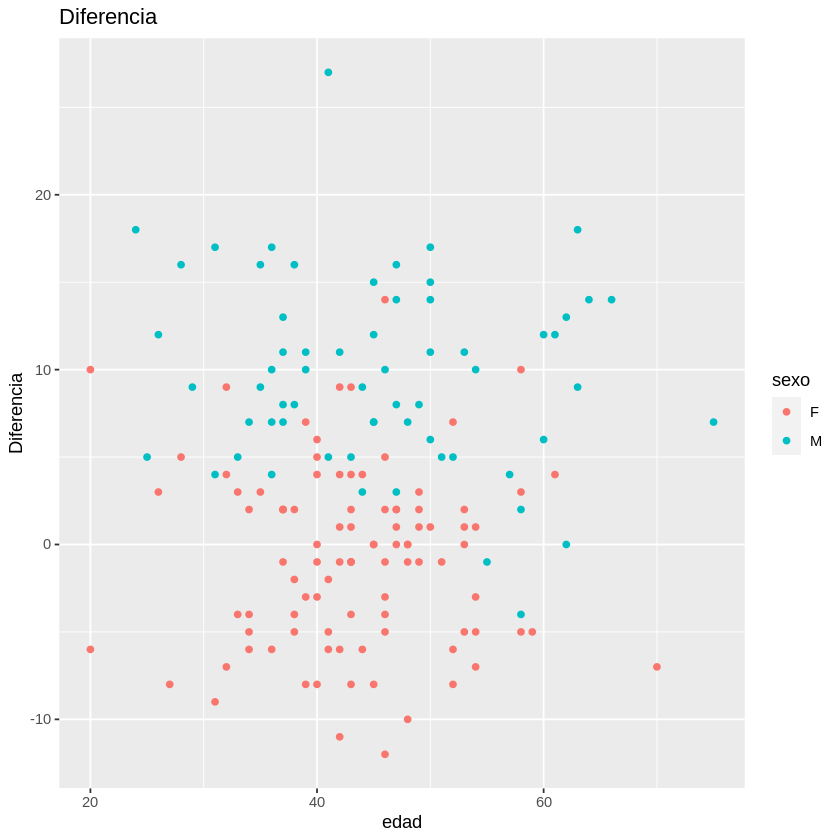

In [ ]:
ggplot(Escala, aes(x=edad, y=Diferencia, color=sexo))+
  geom_point()+ggtitle("Diferencia")

## Combinando

In [ ]:
previo = Escala %>% mutate(puntaje = pre) %>%
   select(edad,sexo, puntaje) %>% 
  mutate(Tipo ="pre")
posterior = Escala %>% mutate(puntaje = pos) %>%
   select(edad,sexo, puntaje) %>%
   mutate(Tipo ="pos")
datos = rbind(previo, posterior)
datos

edad,sexo,puntaje,Tipo
<dbl>,<chr>,<dbl>,<chr>
48,F,83,pre
37,M,58,pre
66,M,63,pre
46,F,73,pre
47,M,64,pre
28,M,63,pre
63,M,68,pre
63,M,58,pre
50,M,59,pre


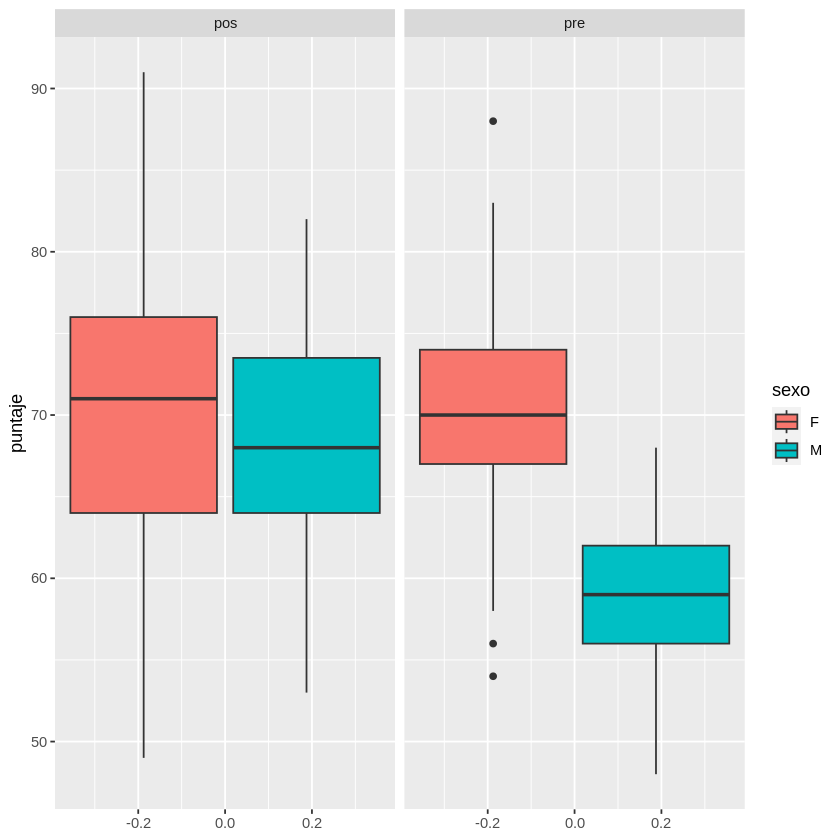

In [ ]:
ggplot(datos, aes(y=puntaje, fill=sexo))+
  geom_boxplot()+facet_grid(.~Tipo)

# Y si tengo muchas covariables, ¡Regresión!

# Y si la variable respuesta es binaria?

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient deceased during the follow-up period (boolean)

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"
falla_cardiaca = read_csv(url)
head(falla_cardiaca)

Rows: 299 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (13): age, anaemia, creatinine_phosphokinase, diabetes, ejection_fractio...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
75,0,582,0,20,1,265000,1.9,130,1,0,4,1
55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
65,0,146,0,20,0,162000,1.3,129,1,1,7,1
50,1,111,0,20,0,210000,1.9,137,1,0,7,1
65,1,160,1,20,0,327000,2.7,116,0,0,8,1
90,1,47,0,40,1,204000,2.1,132,1,1,8,1


In [ ]:
library(tidyverse)
library(readxl)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
library(tidyverse)
library(readxl)
datos = read_excel("/content/Archivo profe (1).xlsx", skip = 1) %>% data.frame()
colnames(datos) = c("Q10", "Q30", "Q491","Q492", "Q493", "Q494", "Q495", "Q52")
pvalores = matrix(1, ncol=dim(datos)[2], nrow=dim(datos)[2])
gcontingencia = matrix(1, ncol=dim(datos)[2], nrow=dim(datos)[2])
for(i in 1:dim(datos)[2]){
  for (j in 1:dim(datos)[2]){
    tabla = table(datos[,i], datos[,j])
    FF = fisher.test(tabla)
    GG = chisq.test(tabla)
    pvalores[i,j] = FF$p.value
    gcontingencia[i,j] = sqrt(2)*sqrt(GG$statistic/(dim(datos)[1]+GG$statistic))
  }
}

colnames(pvalores) = colnames(datos)
rownames(pvalores) = colnames(datos)


colnames(gcontingencia) = colnames(datos)
rownames(gcontingencia) = colnames(datos)

Warning message in chisq.test(tabla):
“Chi-squared approximation may be incorrect”


In [ ]:
round(pvalores,5)

,Q10,Q30,Q491,Q492,Q493,Q494,Q495,Q52
Q10,0.00000,0.00000,0.00136,0.00238,0.04099,0.00057,0.03020,0.41789
Q30,0.00000,0.00000,0.39948,0.74784,0.36180,0.00993,0.26531,0.04796
Q491,0.00136,0.39948,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
Q492,0.00238,0.74784,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
Q493,0.04099,0.36180,0.00000,0.00000,0.00000,0.00000,0.00000,0.81187
Q494,0.00057,0.00993,0.00000,0.00000,0.00000,0.00000,0.00000,0.81108
Q495,0.03020,0.26531,0.00000,0.00000,0.00000,0.00000,0.00000,0.67481
Q52,0.41789,0.04796,1.00000,1.00000,0.81187,0.81108,0.67481,0.00000


In [ ]:
round(gcontingencia,4)

,Q10,Q30,Q491,Q492,Q493,Q494,Q495,Q52
Q10,0.9899,0.4761,0.3432,0.3152,0.2118,0.3620,0.2166,0.0909
Q30,0.4761,0.9935,0.0853,0.0261,0.0967,0.2683,0.1058,0.2088
Q491,0.3432,0.0853,0.9933,0.6894,0.6803,0.5465,0.6470,0.0000
Q492,0.3152,0.0261,0.6894,0.9939,0.7152,0.6531,0.7299,0.0000
Q493,0.2118,0.0967,0.6803,0.7152,0.9922,0.8026,0.6488,0.0179
Q494,0.3620,0.2683,0.5465,0.6531,0.8026,0.9921,0.6651,0.0259
Q495,0.2166,0.1058,0.6470,0.7299,0.6488,0.6651,0.9939,0.0375
Q52,0.0909,0.2088,0.0000,0.0000,0.0179,0.0259,0.0375,0.9872
